In [130]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
    add_new_deep_sup,
    custom_plots,
    compress_repeated_epochs
)
from ripple_heterogeneity.readout import assembly_multi_region, assembly_multi_region_member_psth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import os
from statannot import add_stat_annotation
from statannotations.Annotator import Annotator
import glob
import pickle
import itertools
from scipy.stats import zscore

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

In [93]:
save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\assembly_multi_region_20ms_dt_sleep_compress_v2"
sessions = glob.glob(save_path + os.sep + "*.pkl")
sessions_df = pd.DataFrame()
sessions_df["basepath"] = sessions

In [ ]:
save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\assembly_multi_region_member_psth_v2"

batch_analysis.run(
    sessions_df,
    save_path,
    assembly_multi_region_member_psth.run,
    parallel=True,
    skip_if_error=False,
    verbose=True,
)

ccgs, label_df = assembly_multi_region_member_psth.load_results(save_path)


In [149]:
ccgs, label_df = assembly_multi_region_member_psth.load_results(save_path)


 88%|████████▊ | 92/104 [07:02<01:01,  5.14s/it]

In [134]:
# ccgs_zscore = ccgs.apply(zscore)
ccgs_zscore = zscore(ccgs,axis=0)


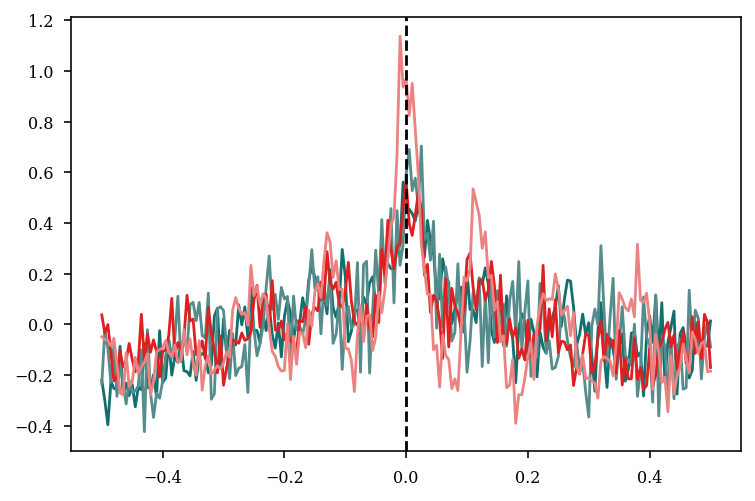

In [135]:
idx = (label_df.deepSuperficial_ref == "Deep") & (label_df.brainRegion_tar == "PFC") & (label_df.is_member_sig_ref == True) & (label_df.is_member_sig_tar == True)
ccgs_zscore.loc[:,idx].mean(axis=1).plot(color="#116f70")

idx = (label_df.deepSuperficial_ref == "Superficial") & (label_df.brainRegion_tar == "PFC") & (label_df.is_member_sig_ref == True) & (label_df.is_member_sig_tar == True)
ccgs_zscore.loc[:,idx].mean(axis=1).plot(color="#568c8c")

idx = (label_df.deepSuperficial_ref == "Deep") & (label_df.brainRegion_tar == "MEC") & (label_df.is_member_sig_ref == True) & (label_df.is_member_sig_tar == True)
ccgs_zscore.loc[:,idx].mean(axis=1).plot(color="#de2020")

idx = (label_df.deepSuperficial_ref == "Superficial") & (label_df.brainRegion_tar == "MEC") & (label_df.is_member_sig_ref == True) & (label_df.is_member_sig_tar == True)
ccgs_zscore.loc[:,idx].mean(axis=1).plot(color="#eb8383")
plt.axvline(0,linestyle="--",color="k")

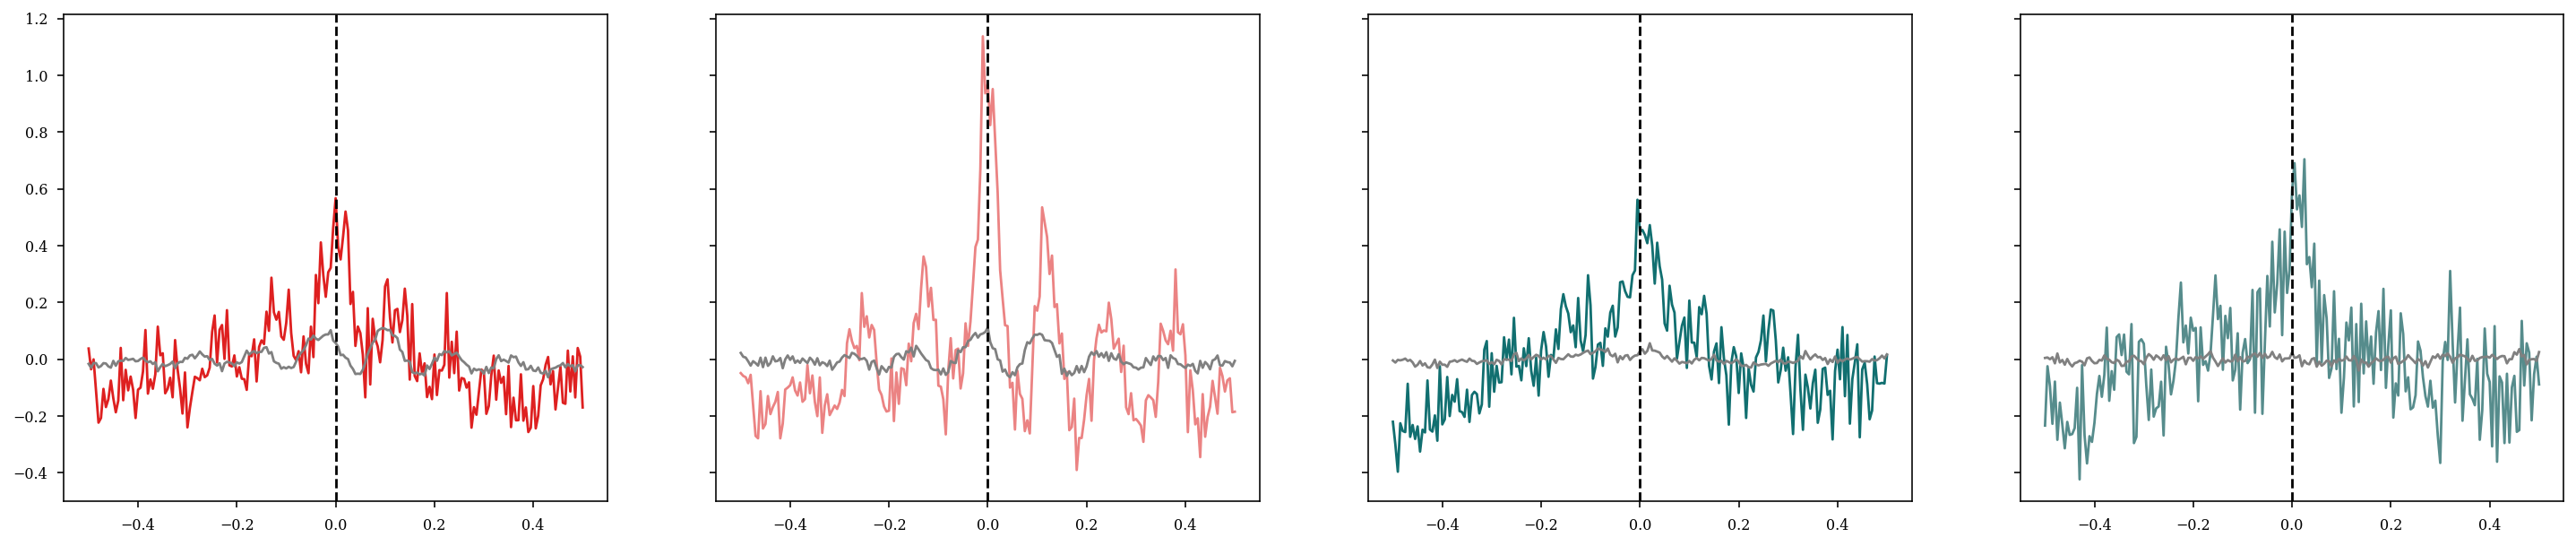

In [148]:
def confidence_intervals(X, conf=0.95):
    # remove nans
    X = X[np.sum(np.isnan(X), axis=1) == 0, :]
    # compute interval for each column
    interval = [
        stats.t.interval(conf, len(a) - 1, loc=np.mean(a), scale=stats.sem(a))
        for a in X.T
    ]
    interval = np.vstack(interval)
    lower = interval[:, 0]
    upper = interval[:, 1]
    return lower, upper

def plot_psth(
    ccgs_zscore,
    label_df,
    deepSuperficial_ref,
    brainRegion_tar,
    is_member_sig_ref,
    is_member_sig_tar,
    color,
    ax,
):
    idx = (
        (label_df.deepSuperficial_ref == deepSuperficial_ref)
        & (label_df.brainRegion_tar == brainRegion_tar)
        & (label_df.is_member_sig_ref == is_member_sig_ref)
        & (label_df.is_member_sig_tar == is_member_sig_tar)
    )
    ax.plot(ccgs_zscore.loc[:, idx].mean(axis=1), color=color)
    lower, upper = confidence_intervals(psth.T)

    ax.fill_between(
        ccgs_zscore.index,
        lower,
        upper,
        color=color,
        alpha=0.5,
        linewidth=0,
    )

fig, ax = plt.subplots(1, 4, figsize=(25, 5), sharey=True)


plot_psth(ccgs_zscore,label_df,"Deep","MEC",True,True,"#de2020",ax[0])
plot_psth(ccgs_zscore,label_df,"Deep","MEC",False,False,"grey",ax[0])

plot_psth(ccgs_zscore,label_df,"Superficial","MEC",True,True,"#eb8383",ax[1])
plot_psth(ccgs_zscore,label_df,"Superficial","MEC",False,False,"grey",ax[1])

plot_psth(ccgs_zscore,label_df,"Deep","PFC",True,True,"#116f70",ax[2])
plot_psth(ccgs_zscore,label_df,"Deep","PFC",False,False,"grey",ax[2])

plot_psth(ccgs_zscore,label_df,"Superficial","PFC",True,True,"#568c8c",ax[3])
plot_psth(ccgs_zscore,label_df,"Superficial","PFC",False,False,"grey",ax[3])

for i in range(4):
    ax[i].axvline(0, linestyle="--", color="k")


In [ ]:
idx = (results["label_df"].deepSuperficial_ref == "Deep") & (results["label_df"].brainRegion_tar == "PFC")
sns.heatmap(results["ccgs"].loc[:,idx].T)
plt.show()

idx = (results["label_df"].deepSuperficial_ref == "Superficial") & (results["label_df"].brainRegion_tar == "PFC")
sns.heatmap(results["ccgs"].loc[:,idx].T)

In [48]:
results["react"].patterns.shape

prop_df, assembly_df = assembly_multi_region.compile_results_df(results)


c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
c:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars


In [95]:
results["react"].basepath


KeyError: 'react'

In [68]:
results["react"].epoch_df


,name,startTime,stopTime,environment
0,preSleep_210413_065510,0.0,9155.69915,sleep
1,maze_210413_110611,9155.6992,12948.10235,linear
2,postSleep_210413_124135,12948.1024,22402.39355,sleep


In [51]:
assembly_n = 0
current_assembly = assembly_df.query("assembly_n == @assembly_n")
x = np.arange(0, current_assembly.shape[0])
pairs = np.array(list(itertools.combinations(x, 2)))
# pairwise_cross_corr(spks, binsize=0.001, nbins=100, return_index=False, pairs=pairs)


In [69]:
current_assembly


,patterns,is_member_sig,assembly_n,UID,putativeCellType,brainRegion,deepSuperficial,deepSuperficialDistance
0,0.029613,False,0,3,Pyramidal Cell,PFC,Cortical,NaN
1,-0.055018,False,0,4,Pyramidal Cell,PFC,Cortical,NaN
2,-0.008163,False,0,5,Pyramidal Cell,PFC,Cortical,NaN
3,0.037049,False,0,6,Pyramidal Cell,PFC,Cortical,NaN
4,-0.010714,False,0,7,Pyramidal Cell,PFC,Cortical,NaN
...,...,...,...,...,...,...,...,...
273,-0.011892,False,0,375,Pyramidal Cell,MEC,Cortical,NaN
274,-0.033032,False,0,380,Pyramidal Cell,MEC,Cortical,NaN
275,0.067169,False,0,381,Pyramidal Cell,MEC,Cortical,NaN
276,-0.091132,False,0,382,Pyramidal Cell,MEC,Cortical,NaN


In [72]:
200 * 0.005


1.0

In [64]:
def get_pairs(current_assembly):
    x = np.arange(0, current_assembly.shape[0])
    pairs = np.array(list(itertools.combinations(x, 2)))

    # add ref and tar metadata
    label_df = pd.DataFrame()
    label_df["idx_ref"] = pairs[:, 0]
    label_df["idx_tar"] = pairs[:, 1]

    label_df["UID_ref"] = current_assembly.UID.iloc[pairs[:, 0]].values
    label_df["UID_tar"] = current_assembly.UID.iloc[pairs[:, 1]].values

    label_df["brainRegion_ref"] = current_assembly.brainRegion.iloc[pairs[:, 0]].values
    label_df["brainRegion_tar"] = current_assembly.brainRegion.iloc[pairs[:, 1]].values

    label_df["deepSuperficial_ref"] = current_assembly.deepSuperficial.iloc[
        pairs[:, 0]
    ].values
    label_df["deepSuperficial_tar"] = current_assembly.deepSuperficial.iloc[
        pairs[:, 1]
    ].values

    label_df["is_member_sig_ref"] = current_assembly.is_member_sig.iloc[
        pairs[:, 0]
    ].values
    label_df["is_member_sig_tar"] = current_assembly.is_member_sig.iloc[
        pairs[:, 1]
    ].values

    # relabel as simple keys
    label_df.loc[
        label_df.brainRegion_ref.str.contains("CA1"), "brainRegion_ref"
    ] = "CA1"
    label_df.loc[
        label_df.brainRegion_tar.str.contains("CA1"), "brainRegion_tar"
    ] = "CA1"

    label_df.loc[
        label_df.brainRegion_ref.str.contains("EC5|EC4|EC2|EC3|EC1"), "brainRegion_ref"
    ] = "MEC"
    label_df.loc[
        label_df.brainRegion_tar.str.contains("EC5|EC4|EC2|EC3|EC1"), "brainRegion_tar"
    ] = "MEC"

    # remove within region comparisons
    label_df = label_df.query("brainRegion_ref != brainRegion_tar")

    # put cortex always as target
    idx = label_df.brainRegion_tar.str.contains("CA1")
    idx_tar = label_df.loc[idx, "idx_tar"]
    label_df.loc[idx, "idx_tar"] = label_df.loc[idx, "idx_ref"]
    label_df.loc[idx, "idx_ref"] = idx_tar

    UID_tar = label_df.loc[idx, "UID_tar"]
    label_df.loc[idx, "UID_tar"] = label_df.loc[idx, "UID_ref"]
    label_df.loc[idx, "UID_ref"] = UID_tar

    brainRegion_tar = label_df.loc[idx, "brainRegion_tar"]
    label_df.loc[idx, "brainRegion_tar"] = label_df.loc[idx, "brainRegion_ref"]
    label_df.loc[idx, "brainRegion_ref"] = brainRegion_tar

    deepSuperficial_tar = label_df.loc[idx, "deepSuperficial_tar"]
    label_df.loc[idx, "deepSuperficial_tar"] = label_df.loc[idx, "deepSuperficial_ref"]
    label_df.loc[idx, "deepSuperficial_ref"] = deepSuperficial_tar

    is_member_sig_tar = label_df.loc[idx, "is_member_sig_tar"]
    label_df.loc[idx, "is_member_sig_tar"] = label_df.loc[idx, "is_member_sig_ref"]
    label_df.loc[idx, "is_member_sig_ref"] = is_member_sig_tar

    return label_df


label_df = get_pairs(current_assembly)
label_df


,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar
136,137,0,192,3,CA1,PFC,Deep,Cortical
137,138,0,193,3,CA1,PFC,middle,Cortical
138,139,0,194,3,CA1,PFC,middle,Cortical
139,140,0,195,3,CA1,PFC,Deep,Cortical
140,141,0,196,3,CA1,PFC,Deep,Cortical
...,...,...,...,...,...,...,...,...
37463,231,273,299,375,CA1,MEC,Superficial,Cortical
37464,231,274,299,380,CA1,MEC,Superficial,Cortical
37465,231,275,299,381,CA1,MEC,Superficial,Cortical
37466,231,276,299,382,CA1,MEC,Superficial,Cortical


In [109]:
label_df[(label_df.brainRegion_ref == "CA1") & (label_df.deepSuperficial_ref.str.contains("Deep|Superficial"))]

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,assembly_n,basepath
1,155,0,232,1,CA1,PFC,Deep,Cortical,0,Z:\Data\HMC1\day9
4,158,0,235,1,CA1,PFC,Superficial,Cortical,0,Z:\Data\HMC1\day9
6,160,0,237,1,CA1,PFC,Deep,Cortical,0,Z:\Data\HMC1\day9
8,162,0,240,1,CA1,PFC,Superficial,Cortical,0,Z:\Data\HMC1\day9
10,164,0,242,1,CA1,PFC,Deep,Cortical,0,Z:\Data\HMC1\day9
...,...,...,...,...,...,...,...,...,...,...
257917,222,242,310,371,CA1,MEC,Deep,Cortical,20,Z:\Data\HMC1\day9
257918,222,243,310,385,CA1,MEC,Deep,Cortical,20,Z:\Data\HMC1\day9
257919,222,244,310,389,CA1,MEC,Deep,Cortical,20,Z:\Data\HMC1\day9
257920,222,245,310,390,CA1,MEC,Deep,Cortical,20,Z:\Data\HMC1\day9


In [66]:
label_df[["idx_ref", "idx_tar"]].values


array([[137,   0],
       [138,   0],
       [139,   0],
       ...,
       [231, 275],
       [231, 276],
       [231, 277]])

In [ ]:
for assembly_n in assembly_df.assembly_n.unique():
    current_assembly = assembly_df.query("assembly_n == @assembly_n")
    x = np.arange(0, current_assembly.shape[0])
    pairs = np.array(list(itertools.combinations(x, 2)))
    pairwise_cross_corr(spks, binsize=0.001, nbins=100, return_index=False, pairs=pairs)


In [10]:
results["react"].cell_metrics


,CA1depth,UID,ab_ratio,acg_asymptote,acg_c,acg_d,acg_fit_rsquare,acg_h,acg_refrac,acg_tau_burst,...,tags_N,tags_Bad,tags_bad_waveform,basename,basepath,sex,species,strain,geneticLine,cellCount
58,4.0,59,-0.363518,4.422386,32.004365,1.399340,0.981291,52.038457,5.657178,1.111022,...,False,False,False,day19,Z:\Data\AYAold\AYA7\day19,Male,Rat,Long Evans,Wild type,97
59,2.0,60,-0.327785,2.814130,24.403642,1.517664,0.892941,37.571183,7.462676,3.190546,...,False,False,False,day19,Z:\Data\AYAold\AYA7\day19,Male,Rat,Long Evans,Wild type,97
61,3.0,62,-0.220249,5.398217,18.767424,1.523734,0.951894,33.712458,5.178015,0.961793,...,False,False,False,day19,Z:\Data\AYAold\AYA7\day19,Male,Rat,Long Evans,Wild type,97
63,2.0,64,-0.274261,4.163044,16.089616,1.532905,0.941452,28.510750,5.825414,0.983004,...,False,False,False,day19,Z:\Data\AYAold\AYA7\day19,Male,Rat,Long Evans,Wild type,97
64,3.0,65,-0.365706,5.034052,36.418960,1.010596,0.980614,39.739000,5.112032,1.037979,...,False,False,False,day19,Z:\Data\AYAold\AYA7\day19,Male,Rat,Long Evans,Wild type,97
68,1.0,69,-0.268781,2.976209,20.117782,1.621998,0.963035,37.181381,6.745081,1.152559,...,False,False,False,day19,Z:\Data\AYAold\AYA7\day19,Male,Rat,Long Evans,Wild type,97
70,2.0,71,-0.125677,2.309952,19.827901,1.470385,0.952999,22.214602,3.693956,1.169389,...,False,False,False,day19,Z:\Data\AYAold\AYA7\day19,Male,Rat,Long Evans,Wild type,97
71,0.0,72,-0.256123,5.186659,14.516616,1.477785,0.944587,22.351363,5.621984,1.185120,...,False,False,False,day19,Z:\Data\AYAold\AYA7\day19,Male,Rat,Long Evans,Wild type,97
72,0.0,73,-0.221650,7.708261,17.337501,1.483565,0.891020,29.040919,5.830116,1.129212,...,False,False,False,day19,Z:\Data\AYAold\AYA7\day19,Male,Rat,Long Evans,Wild type,97
73,0.0,74,-0.299624,4.417212,21.760516,1.453222,0.972112,37.818332,5.391420,1.016130,...,False,False,False,day19,Z:\Data\AYAold\AYA7\day19,Male,Rat,Long Evans,Wild type,97
